# Chapter 3

## Initial setup

In [1]:
import arviz as az
import numpy as np
import pymc as pm

from matplotlib import pylab as plt
from scipy import stats

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

%config InlineBackend.figure_format = 'retina'
%load_ext watermark
az.style.use("arviz-darkgrid")


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


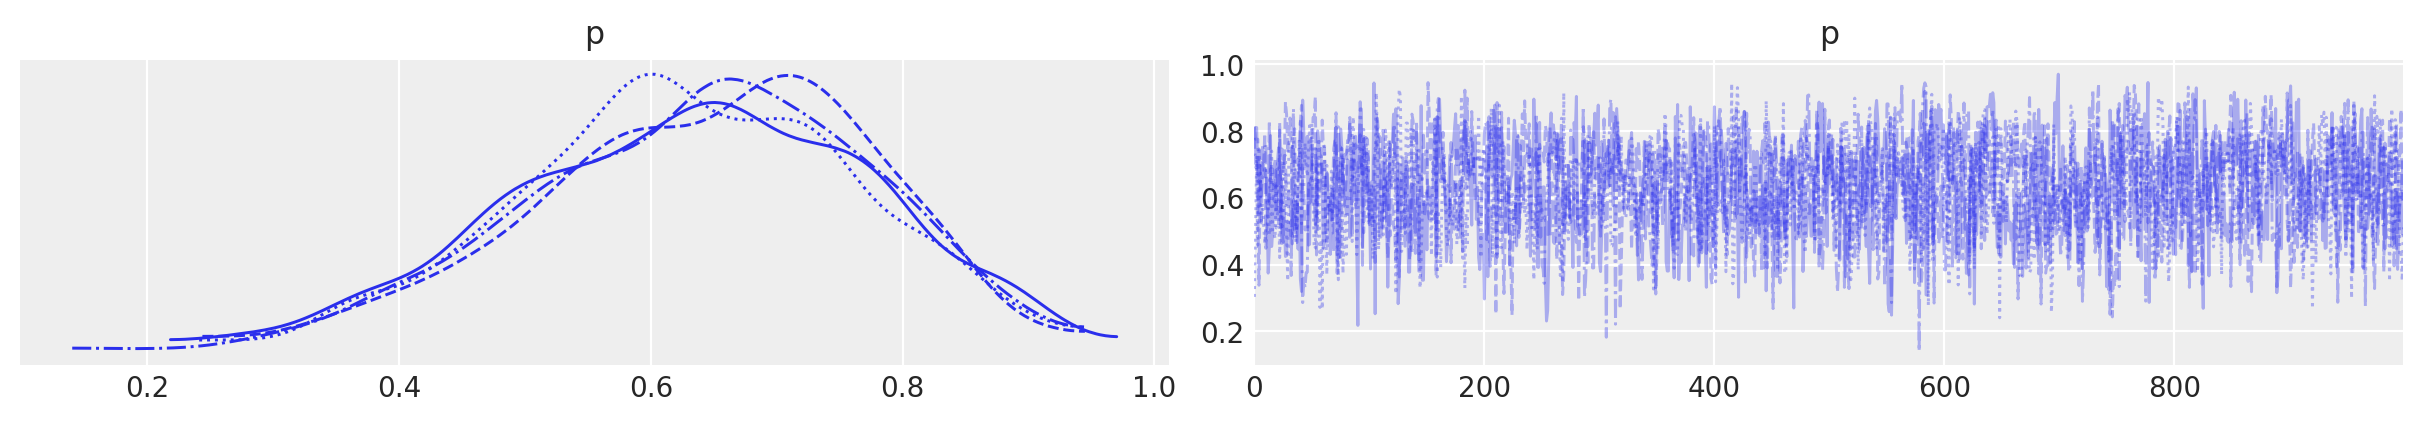

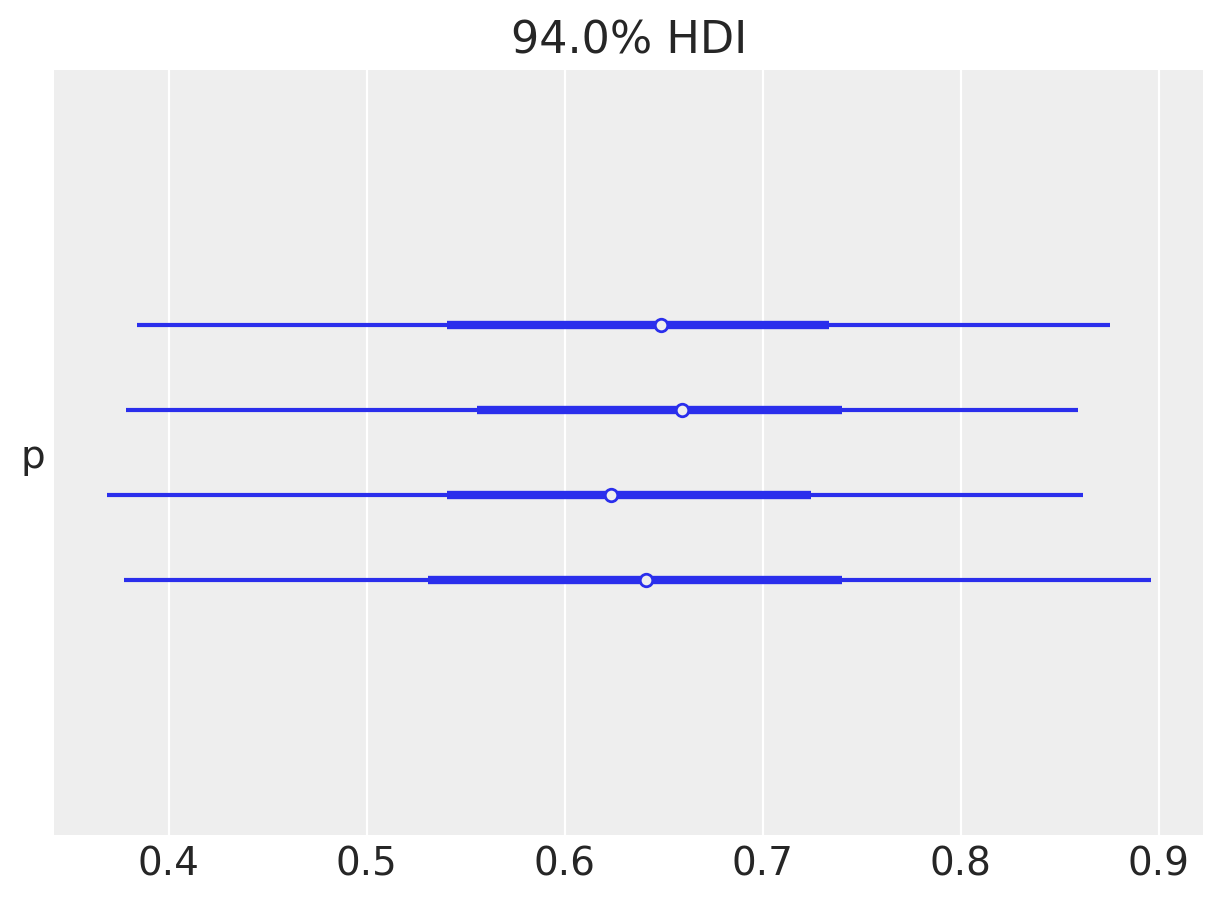

In [20]:
# W L W W W L W L W
data = np.array([1, 0, 1, 1, 1, 0, 1, 0, 1])
with pm.Model() as our_first_model:
    p = pm.Uniform("p")  # set the prior
    y = pm.Bernoulli("y", p=p, observed=data)  # set the posterior
    trace = pm.sample(1000, chains=4)  # get 1000 random_samples
    az.plot_trace(trace)
    az.plot_forest(trace, var_names=["p"])


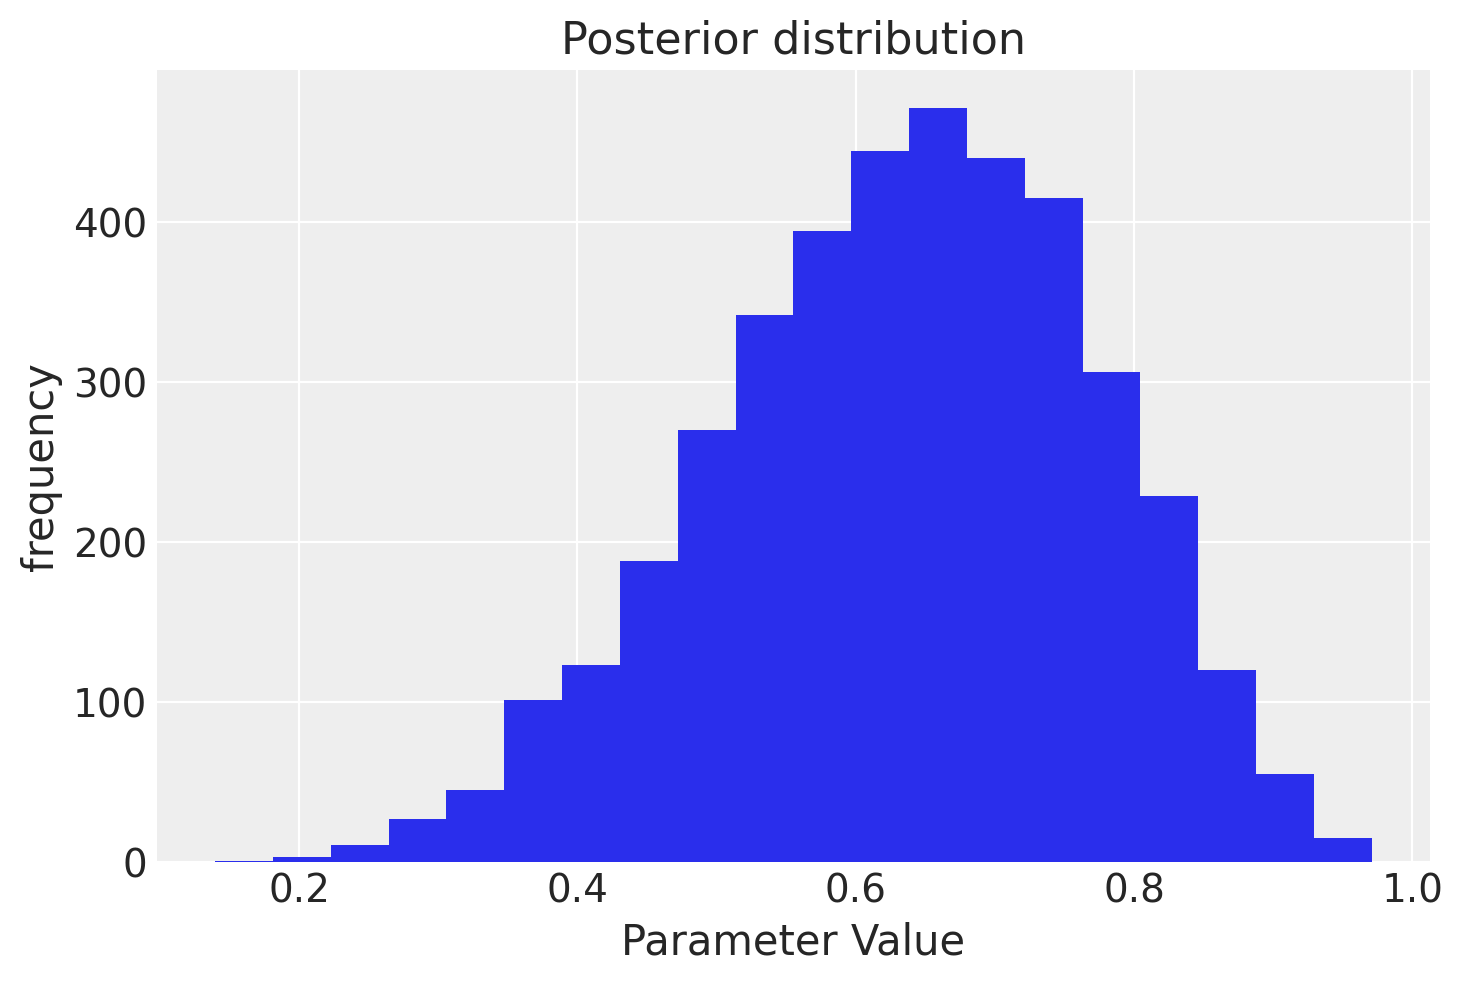

In [21]:
# plot the posterior
posterior_samples = trace.posterior['p'].values.flatten()
plt.hist(posterior_samples, bins=20)
plt.title("Posterior distribution")
plt.ylabel("frequency")
plt.xlabel("Parameter Value");



## 3E1.

How much posterior probability lies below p = 0.2?


In [22]:
samples = trace.posterior.p.values[0]
np.sum(samples < 0.2) / samples.size


0.0

## 3E2

How much posterior probability lies above p = 0.8?

In [23]:
np.sum(samples > 0.8) / samples.size


0.113

## 3E3

How much posterior probability lies between p = 0.2 and p = 0.8?

In [25]:
np.sum((samples > 0.2) & (samples < 0.8)) / samples.size


0.887

## 3E4

20% of the posterior probability lies below which value of p?

In [26]:
np.quantile(samples, 0.2)


0.5024420993966722